# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

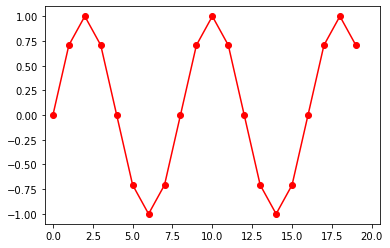

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

# 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
- (대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [15]:
X_train = S[:-1, :5][:, :, np.newaxis]
Y_train = S[:-1, 5]
X_train.shape, Y_train.shape

((18, 5, 1), (18,))

In [20]:
X_train[:5]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01]],

       [[ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16]]])

In [21]:

Y_train[:5]

array([-7.07106781e-01, -1.00000000e+00, -7.07106781e-01, -2.44929360e-16,
        7.07106781e-01])

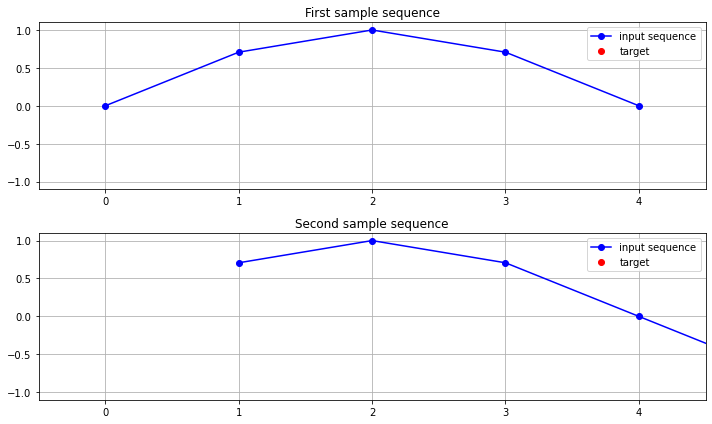

In [23]:

plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2, 3, 4], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([5], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3 ,4 ,5], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([5], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [25]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(5, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mse', optimizer='sgd')

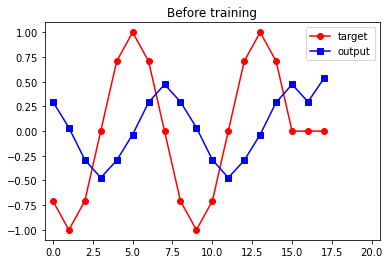

In [28]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [29]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5708
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.5180
Epoch 3/100
18/18 [==============================] - 0s 55us/step - loss: 0.4711
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.4292
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 0.3917
Epoch 6/100
18/18 [==============================] - 0s 294us/step - loss: 0.3581
Epoch 7/100
18/18 [==============================] - 0s 126us/step - loss: 0.3278
Epoch 8/100
18/18 [==============================] - 0s 111us/step - loss: 0.3005
Epoch 9/100
18/18 [==============================] - 0s 56us/step - loss: 0.2758
Epoch 10/100
18/18 [==============================] - 0s 78us/step - loss: 0.2535
Epoch 11/100
18/18 [==============================] - 0s 55us/step - loss: 0.2333
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.2150
Epoch 13/100
18/18 [=====

# 결과 확인

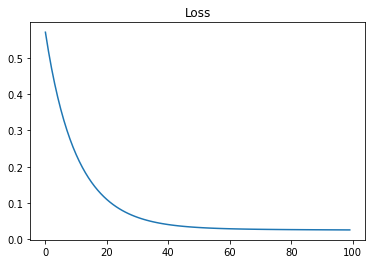

In [30]:

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

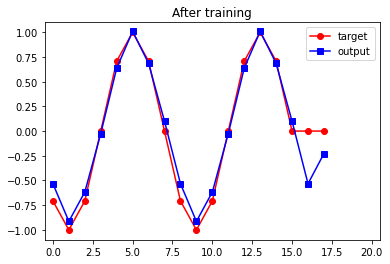

In [31]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [32]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_3/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.35341978, -0.72057015, -0.35027036, -0.13664708,  0.4913475 ,
        -0.73221827,  0.4679383 , -0.44129613, -0.69660157,  0.1605812 ]],
      dtype=float32)>

In [33]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_3/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.28020552, -0.01400093, -0.4680715 , -0.0435232 ,  0.28536656,
        -0.4931866 , -0.27793288,  0.03124844,  0.20249797, -0.332401  ],
       [ 0.40122437, -0.15210082, -0.43868336,  0.06843179,  0.14033954,
         0.61634547, -0.12154807, -0.12775277, -0.22929524, -0.26516503],
       [-0.19872479, -0.16243361,  0.39575803,  0.21700296, -0.0769058 ,
         0.24656795,  0.14482158,  0.03018003,  0.42796946, -0.7254737 ],
       [-0.10483887,  0.4694106 , -0.0667788 , -0.15681104, -0.27218303,
         0.31024164, -0.6050609 ,  0.2799517 ,  0.31150892,  0.0836047 ],
       [-0.19421434, -0.26503813, -0.19567418,  0.5884895 ,  0.08862521,
         0.07311063, -0.13285625, -0.3452536 ,  0.42806834,  0.4064248 ],
       [ 0.10656837,  0.0113509 ,  0.46790105,  0.27228826,  0.66100365,
        -0.04308621, -0.30090827,  0.3201467 , -0.1795868 , -0.03134397],
       [ 0.34336314,  0.34502387, 

In [34]:

# bias
model.weights[2]

<tf.Variable 'simple_rnn_3/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.00140184, -0.01057371,  0.00542961, -0.00649467,  0.0013411 ,
       -0.01852618, -0.00312249, -0.0082835 ,  0.01340355, -0.00961423],
      dtype=float32)>